# 蒙特卡洛法

蒙特卡洛方法是一种基于随机采样的数值计算方法，主要用于解决复杂的数学问题，尤其是那些难以用解析方法解决的问题。
其核心思想是利用随机采样来估计数学期望、概率和其他相关的量。

需要利用概率进行求解的一种方法，可以说是暴力求解的一部分

### 求圆周率

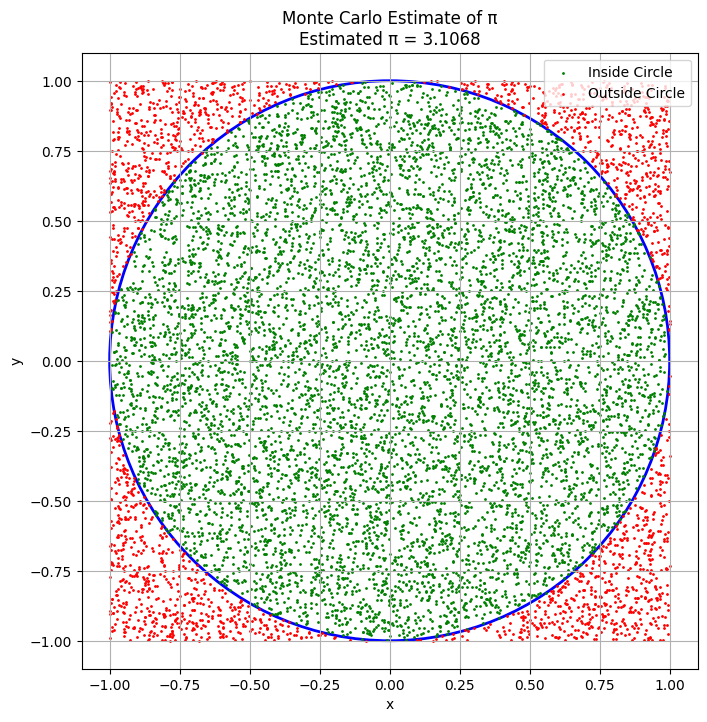

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n_points = 10000  # 生成的点的数量
radius = 1  # 圆的半径
center = (0, 0)  # 圆心

# 生成随机点
np.random.seed(0)  # 设置随机种子以便复现
x = np.random.uniform(-radius, radius, n_points)
y = np.random.uniform(-radius, radius, n_points)

# 计算每个点是否在圆内
inside_circle = (x**2 + y**2) <= radius**2

# 计算π的估计值
pi_estimate = (np.sum(inside_circle) / n_points) * 4

# 绘图
fig, ax = plt.subplots(figsize=(8, 8))

# 绘制圆
circle = plt.Circle(center, radius, color='b', fill=False, linewidth=2)
ax.add_patch(circle)

# 绘制点
ax.scatter(x[inside_circle], y[inside_circle], color='g', s=1, label='Inside Circle')
ax.scatter(x[~inside_circle], y[~inside_circle], color='r', s=1, label='Outside Circle')

# 设置坐标轴
ax.set_aspect('equal', 'box')
ax.set_xlim(-radius-0.1, radius+0.1)
ax.set_ylim(-radius-0.1, radius+0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Monte Carlo Estimate of π\nEstimated π = {pi_estimate:.4f}')
ax.legend()

# 显示图形
plt.grid(True)
plt.show()

### 求函数最小值

Estimated minimum point: 2.0013805460744916
Estimated minimum value: 1.9059074638505535e-06


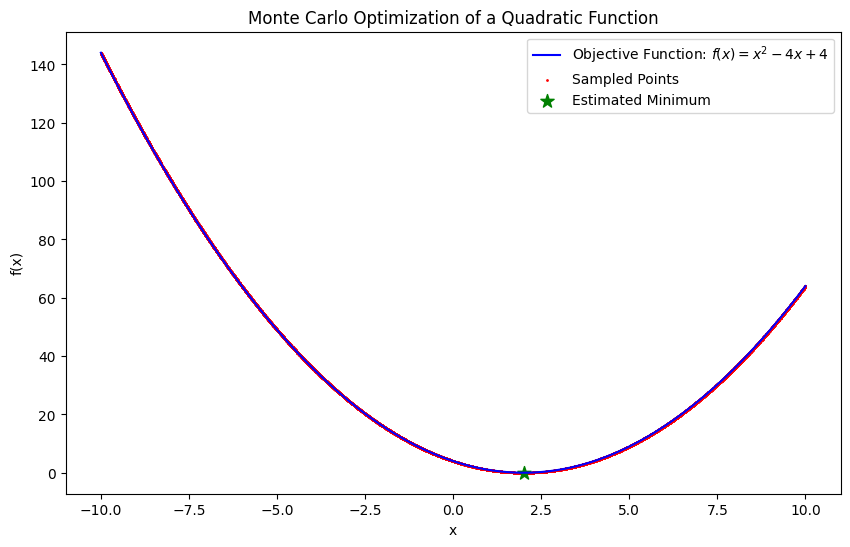

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义二次目标函数
def objective_function(x):
    return x**2 - 4*x + 4

# 参数设置
n_samples = 10000  # 采样点的数量
x_min, x_max = -10, 10  # x的范围

# 随机生成点
np.random.seed(0)
x_samples = np.random.uniform(x_min, x_max, n_samples)

# 计算目标函数值
f_values = objective_function(x_samples)

# 找到最小值
min_index = np.argmin(f_values)
min_point = x_samples[min_index]
min_value = f_values[min_index]

print(f"Estimated minimum point: {min_point}")
print(f"Estimated minimum value: {min_value}")

# 绘制目标函数
x_plot = np.linspace(x_min, x_max, 100)
y_plot = objective_function(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Objective Function: $f(x) = x^2 - 4x + 4$', color='blue')
plt.scatter(x_samples, f_values, c='red', s=1, label='Sampled Points')
plt.scatter(min_point, min_value, c='green', marker='*', s=100, label='Estimated Minimum')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monte Carlo Optimization of a Quadratic Function')
plt.legend()